# Sentiment Analysis: Classification Models & Clusters

# Please skip the preprocessing section & scroll down to the section 5.2 Exercise

## Part 1: Using the TextBlob Sentiment Analyzer

In [1]:
# Import Pandas and Numby libraries
import pandas as pd
import numpy as np

# import nltk library
import nltk

# Import textblob to perform sentiment analysis
from textblob import TextBlob

# import accuracy calculator from sklearn
from sklearn.metrics import accuracy_score

# Import Vader Sentiment Analyzer from the NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# 1. Load the movie sentiment data
df_mv = pd.read_csv('labeledTrainData.tsv', sep="\t")

In [3]:
# display the data
df_mv.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
# View the data
df_mv.shape

(25000, 3)

In [5]:
# 2. Count each positive and negative reviews.  There are 12,500 positive reviews and 12,500 negative reviews. 

df_mv['sentiment'].value_counts()

0    12500
1    12500
Name: sentiment, dtype: int64

In [6]:

# 3. Classify each movie review as positive or negative

## Create a function to get the polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

## Create a new column 'TextBlob Polarity' 
df_mv['TextBlob_polarity'] = df_mv['review'].apply(getPolarity)
#df_mv['TextBlob_sentiment'] = df_mv['sentiment'].apply(getPolarity)

## Create a function to get the sentiment. A polarity score >- 0 is positive and less than 0 is a negative sentiment.
def getAnalysis(score):
    if score >= 0:
        return '1'
    elif score <= 0:
        return '0'
    else:
        return '-1'
## Create a new column 'TextBlob Sentiment'     
df_mv['TextBlob_Sentiment'] = (df_mv['TextBlob_polarity'].apply(getAnalysis)).astype(int)

## View the updted data frame
df_mv.head()
  

,id,sentiment,review,TextBlob_polarity,TextBlob_Sentiment
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,1
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,1
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0
3,3630_4,0,It must be assumed that those who praised this...,0.134753,1
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0


In [7]:
# 4. Check the accuracy of the model.  This model appears to better than random guessing.

TB_Acc = accuracy_score(df_mv['sentiment'], df_mv['TextBlob_Sentiment'])
print('TextBlob Accuracy:', TB_Acc)

TextBlob Accuracy: 0.68524


In [8]:
# Import VADER Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [9]:
# Initialize a SentimentIntensityAnalyzer object
vds=SentimentIntensityAnalyzer()

# 5. Define a function to perform the VADER sentiment analyzer and repeat steps 3) and 4) 
def VaderAnalyzer(text):
    return vds.polarity_scores(text)
    
    # Create a score dict variable for the Vader Polarity scores 
    score_dict = vds.polarity_scores(score)

## Create a column for Vader Polarity
df_mv['Vader_polarity'] = df_mv['review'].apply(VaderAnalyzer)
## Create a colunm for Vader Movie Review Sentiment 
df_mv['Vader_MV_Sentiment'] = df_mv['Vader_polarity'].apply(lambda score_dict: int(score_dict['compound'] >= 0 ))
## Show the updated Movie Review data frame with the Vader Sentimeent Analysis
df_mv.head()


,id,sentiment,review,TextBlob_polarity,TextBlob_Sentiment,Vader_polarity,Vader_MV_Sentiment
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,1,"{'neg': 0.13, 'neu': 0.744, 'pos': 0.126, 'com...",0
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,1,"{'neg': 0.047, 'neu': 0.739, 'pos': 0.214, 'co...",1
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0,"{'neg': 0.142, 'neu': 0.8, 'pos': 0.058, 'comp...",0
3,3630_4,0,It must be assumed that those who praised this...,0.134753,1,"{'neg': 0.066, 'neu': 0.878, 'pos': 0.056, 'co...",0
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0,"{'neg': 0.119, 'neu': 0.741, 'pos': 0.14, 'com...",1


In [10]:
# 5.1 Find out the accuracy of the Vader Sentiment Analyzer
vader_acc = accuracy_score(df_mv['sentiment'], df_mv['Vader_MV_Sentiment'])
print('Vader Sentiment Accuracy:', vader_acc)

Vader Sentiment Accuracy: 0.69356


In [11]:
# 5.2 Compare the results of the two models.  Based on the result, the Vader model seems is slightly more accurate.

model= {'Model': ['TextBlob', 'Vader'], 'Accuracy': [str(round(100*TB_Acc,2))+'%', str(round(100*vader_acc,2))+'%']}
df_model = pd.DataFrame(model)
df_model

,Model,Accuracy
0,TextBlob,68.52%
1,Vader,69.36%


# Part 2: Prepping Text for a Custom Model

In [12]:
# Import Count Vectorizer from Sklearn library
from sklearn.feature_extraction.text import CountVectorizer

# Import regular expression library
import re

In [13]:
# 1 & 2: Convert all text to lowercase letters and remove punctuation/special characters from the text

def clean_text(text):
    # Convert all text to lowercase
    text=text.lower()
    # Remove punctuation and special characters from the text
    text=re.sub('\\d|\\W+|_',' ',text)
    text=re.sub('[^a-zA-Z0-9]'," ", text)
    
    return text

In [14]:
# 3: Remove Stop words

## Load libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Create a function to remove Stop Words
def tokenize_remove_stop_words(text):

    ## Load stop words
    stop_words = stopwords.words('english')

    ## Remove stop words
    tokenized_text = word_tokenize(text)
    text_sans_stopwords=[word for word in tokenized_text if word not in stop_words]
    
    return text_sans_stopwords
    

In [15]:
# 4: Apply NLTK's PorterStemmer

## Load PorterStemmer from NLTK library
from nltk.stem.porter import PorterStemmer

## Create a function to sted the words from the text
def stemmer_text(word_list):
    ## Create stemmer
    porter = PorterStemmer()
    
    return [porter.stem(word) for word in word_list]


In [16]:

# Create a data frame only with reviews and sentiments
df_mv_prep = pd.DataFrame(df_mv[['sentiment','review']])
df_mv_prep.head()


,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [17]:
# 5. Create a bag-og-words matrix from your stemmed text (output from (4))

## 5.1 Create a cleaned review text colunmn that has all lowercase words and all punctuations removed
df_mv_prep['review_clean_text'] = df_mv_prep['review'].apply(clean_text)

# View the cleaned text
df_mv_prep.head()

,sentiment,review,review_clean_text
0,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi...",the classic war of the worlds by timothy hine...
2,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager nicholas bell g...
3,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious ...


In [18]:
## 5.2 Tokenize the review text 
df_mv_prep['review_tokenized'] = df_mv_prep['review_clean_text'].apply(tokenize_remove_stop_words)

## View the tokenized text
df_mv_prep.head()

,sentiment,review,review_clean_text,review_tokenized
0,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,..."
1,1,"\The Classic War of the Worlds\"" by Timothy Hi...",the classic war of the worlds by timothy hine...,"[classic, war, worlds, timothy, hines, enterta..."
2,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager nicholas bell g...,"[film, starts, manager, nicholas, bell, giving..."
3,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme..."
4,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious ...,"[superbly, trashy, wondrously, unpretentious, ..."


In [19]:
## 5.3 Apply PorterStemmer function
df_mv_prep['review_stem'] = df_mv_prep['review_tokenized'].apply(stemmer_text)

# View the stemmed text
df_mv_prep.head()

,sentiment,review,review_clean_text,review_tokenized,review_stem
0,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,...","[stuff, go, moment, mj, start, listen, music, ..."
1,1,"\The Classic War of the Worlds\"" by Timothy Hi...",the classic war of the worlds by timothy hine...,"[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain..."
2,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager nicholas bell g...,"[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc..."
3,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope..."
4,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious ...,"[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, exploi..."


In [237]:
## 5.4 Join the final colunm to the rest of the data frame created
df_mv_prep['review_final'] = df_mv_prep['review_stem'].apply(lambda text: ' '.join(text))

# View the preprocessed text
df_mv_prep.head()

,sentiment,review,review_clean_text,review_tokenized,review_stem,review_final
0,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,...","[stuff, go, moment, mj, start, listen, music, ...",stuff go moment mj start listen music watch od...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi...",the classic war of the worlds by timothy hine...,"[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain...",classic war world timothi hine entertain film ...
2,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager nicholas bell g...,"[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc...",film start manag nichola bell give welcom inve...
3,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope...",must assum prais film greatest film opera ever...
4,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious ...,"[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, exploi...",superbl trashi wondrous unpretenti exploit hoo...


In [238]:
## 5.5 Create a bag-of-words feature matrix to see if the number of rows is the same as the original data frame.
count = CountVectorizer()
bag_of_words = count.fit_transform(df_mv_prep['review_final'])

# Display shape of the feature matrix output
bag_of_words.shape

(25000, 49638)

# 5.2 Exercise: Build Your Own Sentiment Analysis Model

In [239]:
# Import Sklearn libraries
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [275]:
# 1. Create a data frame only with reviews and sentiments
df_review = pd.DataFrame(df_mv_prep[['sentiment','review_final']])
df_review['review_final'].head(10)

0    stuff go moment mj start listen music watch od...
1    classic war world timothi hine entertain film ...
2    film start manag nichola bell give welcom inve...
3    must assum prais film greatest film opera ever...
4    superbl trashi wondrous unpretenti exploit hoo...
5    dont know peopl think bad movi got pretti good...
6    movi could good come way short cheesi special ...
7    watch video friend hous glad wast money buy on...
8    friend mine bought film even grossli overpr de...
9    br br movi full refer like mad max ii wild one...
Name: review_final, dtype: object

In [302]:
# 1a. Find the descriptions of the preprocessed column 'reviw_final'
df_review['review_final'].describe()

count                                                 25000
unique                                                24901
top       realiz watch exact show eight year right could...
freq                                                      3
Name: review_final, dtype: object

In [276]:
# 1b. Split the features and target
X = df_review.drop(['sentiment'], axis =1)
y = df_review['sentiment']

In [284]:
# 2. Split this into a training and test set
X_train, X_test, y_train, y_test = train_test_split(df_review['review_final'], y, test_size = 0.2, random_state=42, stratify=y)

In [285]:
# Create a term frequencey-inverse document frequency (tf-idf) matrix from your stemmed text.

# Load TfidfVectorizer libary
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize Tfidf Vetorizer
tfidf = TfidfVectorizer()


# 3. Fit and apply the tfidf vector to the Training set
tf_X_train = tfidf.fit_transform(X_train)

# 4. Trainsform the test set ONLY.
tf_X_test = tfidf.transform(X_test)


# 4a. Why NOT FIT the if-idf vectorization to the test set?
'''
If we use the fit_transform method on our test data, we will compute a new mean and variance, which will be a new scale 
for each feature, while leting our model learn about our test data. Thus, what is unknown to our model will 
no longer be surprising, and we will not get a good estimate of how our model is performing on the test's 
unseen data.
'''

In [286]:
# 5. Train a logistic regression using the trainng data

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(tf_X_train, y_train)

LogisticRegression()

In [287]:
# 5a. Find the count of the  sentiment field
df_review['sentiment'].value_counts()

0    12500
1    12500
Name: sentiment, dtype: int64

In [301]:
# 5b. Predict the Test results

y_test_pred = LogReg.predict(tf_X_test)
print('Accuracy: ', LogReg.score(tf_X_test, y_test))
     


Accuracy:  0.8892


In [292]:
# 6. Find the model accuracy on the test set
Log_test_score = LogReg.score(tf_X_test, y_test)
print("The test score of the model is: ", Log_test_score)

The test score of the model is:  0.8892


In [291]:
# 6a. Find the model accuracy on the train set  
Log_train_score = LogReg.score(tf_X_train, y_train)
print("The training score of the model is: ", Log_train_score)

The training score of the model is:  0.9286


In [293]:
# 7. Create a Confusion Matrix for the test set predictions
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[2187  313]
 [ 241 2259]]


In [315]:
# 7a. A model accuracy from the confusion matrix to validate 
(2187+2259)/(313+241+2187+2259)

0.8892

In [296]:
# 8. Calculate Precision, Recall, F1-Score & Support
y_pred =LogReg.predict(tf_X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2500
           1       0.88      0.90      0.89      2500

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [303]:
# import libraries to plot a ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt

In [306]:
# 9. Define metrics and Create a ROC curve for the test set
y_pred_proba = LogReg.predict_proba(tf_X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

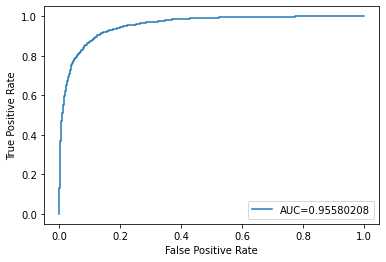

In [307]:
# 9a. Create ROC curve for the test set
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# 10. Applying a Naive Bayes Model to the Steps (5)-(9)

In [308]:
# 10. Import library for Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [309]:
# Build naive bayes classification model using the train data
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tf_X_train, y_train)

MultinomialNB()

In [319]:
# Predict the new document from the testing dataset

y_pred_nv = naive_bayes_classifier.predict(tf_X_test)

# Compute the performance measures  
naive_score = metrics.accuracy_score(y_test, y_pred_nv)

# Find the accuracy on the test set and 
print("accuracy:   %0.3f" % naive_score)

print(metrics.classification_report(y_test, y_pred_nv,
                                            target_names=['Positive', 'Negative']))
# Find and Create a Confusion Matrix for the test set predictions.  And get the precision, recall, and F1-Score
# for the test set predictions

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_nv))

print('------------------------------')

accuracy:   0.861
              precision    recall  f1-score   support

    Positive       0.86      0.87      0.86      2500
    Negative       0.87      0.85      0.86      2500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

confusion matrix:
[[2168  332]
 [ 364 2136]]
------------------------------


In [316]:
# The Naive Bayes Accuracy from the confusion matrix to validate
(2168+2136)/(332+364+2168+2136)

0.8608

In [313]:
# Define metrics for the Naive Bayes Classifier
y_pred_proba1 = naive_bayes_classifier.predict_proba(tf_X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc = metrics.roc_auc_score(y_test, y_pred_proba1)

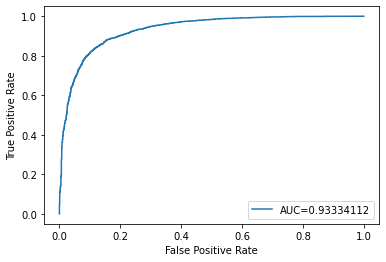

In [314]:
# Create ROC curve for the Naive Bayes Classifier
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()